Indexul de fericire pe anul 2018
(https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019)

Ne dorim sa facem predictie la Score pe baza coloanelor:GDP per capita,Social support,Healty life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption

Importam toate librarile necesare

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Incarcam in Google Drive Dataset-ul

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/2018.csv')

Afisam informatii despre Dataset-ul original

In [ ]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [ ]:
df.shape

(156, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Setul de date X(Input) si Y(Target)

In [ ]:
X = df.drop(['Score','Country or region','Overall rank'], axis=1)
Y = df['Score']

In [ ]:
X

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.305,1.592,0.874,0.681,0.202,0.393
1,1.456,1.582,0.861,0.686,0.286,0.340
2,1.351,1.590,0.868,0.683,0.284,0.408
3,1.343,1.644,0.914,0.677,0.353,0.138
4,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...
151,0.442,1.073,0.343,0.244,0.083,0.064
152,0.455,0.991,0.381,0.481,0.270,0.097
153,0.337,0.608,0.177,0.112,0.224,0.106
154,0.024,0.000,0.010,0.305,0.218,0.038


In [ ]:
Y

0      7.632
1      7.594
2      7.555
3      7.495
4      7.487
       ...  
151    3.355
152    3.303
153    3.254
154    3.083
155    2.905
Name: Score, Length: 156, dtype: float64

x_train-intrare set de antrenare

y_train-iesire set de antrenare

x_test-intrare set de testare

y_test-iesire set de testare

test_size=0.2: 20% setul de antrenare; 80% setul de antrenare

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,shuffle=True, random_state = 0)

Normalizam datele

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Definim modelelul retelei neuronale

Sequential este o clasă din biblioteca Keras, care permite definirea și construirea unui model de rețea neurală secvențială. Un model secvențial este un tip de model de rețea neurală în care straturile sunt adăugate secvențial, una după alta, formând un șir liniar de straturi.

In [ ]:
model = Sequential()

In [ ]:
#primul strat
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
#strat ascuns
model.add(Dense(10, activation='relu'))
#strat iesire
model.add(Dense(1))

Compilare model

In [ ]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

Antrenarea modelului neuronal

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=10, verbose=0)

Predicitia modelului neuronal pentru antrenare si testare

In [ ]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


In [ ]:
print('R^2 Score pentru setul de antrenament:', r2_score(Y_train, Y_pred_train))
print('R^2 Score pentru setul de testare:', r2_score(Y_test, Y_pred_test))


R^2 Score pentru setul de antrenament: 0.8743408317132235
R^2 Score pentru setul de testare: 0.6302047333528573


R-squared score (R^2 score), sau coeficientul de determinare, este o metrică utilizată pentru a evalua performanța unui model de regresie. Este o măsură a variației totală a variabilei de răspuns (y) care este explicată de modelul regresiei.

R-squared score variază între 0 și 1 și cu cât este mai aproape de 1, cu atât modelul de regresie oferă o ajustare mai bună la datele observate. Mai specific, R-squared score indică proporția de variație a variabilei de răspuns care poate fi explicată de modelul de regresie.

Facem Grapic pentru pierderea de date in modelul neuronal

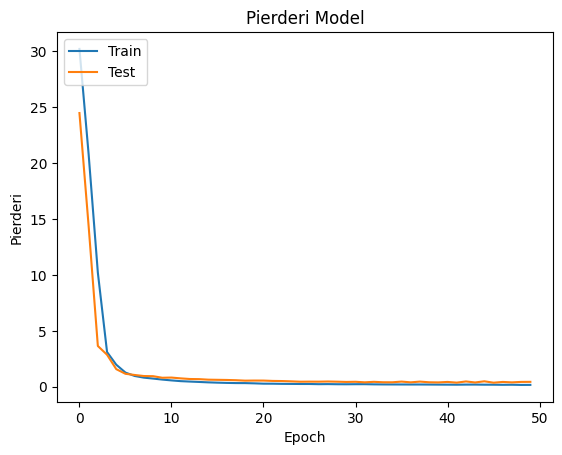

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pierderi Model')
plt.ylabel('Pierderi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Practic modelul neuronal cu cat trece prin Epoch creste rata de invatare

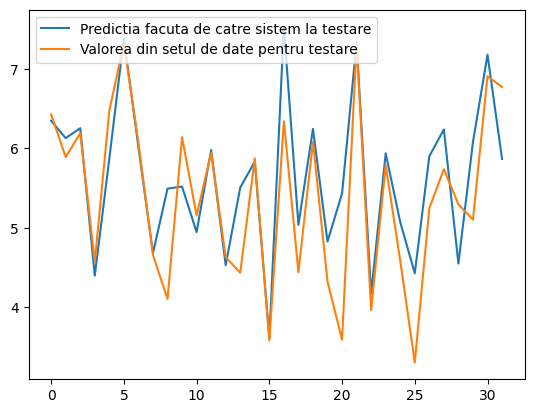

In [ ]:
plt.plot(Y_pred_test)
plt.plot(Y_test.values)
plt.legend(['Predictia facuta de catre sistem la testare', 'Valorea din setul de date pentru testare'], loc='upper left')
plt.show()

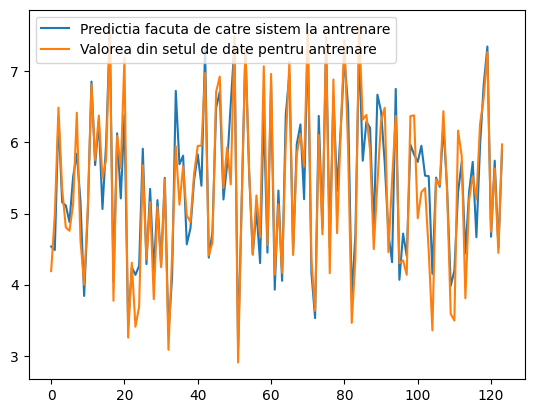

In [ ]:
plt.plot(Y_pred_train)
plt.plot(Y_train.values)
plt.legend(['Predictia facuta de catre sistem la antrenare', 'Valorea din setul de date pentru antrenare'], loc='upper left')
plt.show()